In [19]:
pip install sklearn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pandas

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install keras

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install chart-studio

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install plotly

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
import sklearn
import tensorflow as tf
import pandas
import numpy
import keras

In [25]:
#Step 1a Load Data //CSV needs to be in coloumbs
csv_path = "/tf/GOLDDaily.csv"
dataOPEN = pandas.read_csv(csv_path, usecols=[1])
dataHIGH = pandas.read_csv(csv_path, usecols=[2])
dataLOW = pandas.read_csv(csv_path, usecols=[3])
dataCLOSE = pandas.read_csv(csv_path, usecols=[4])

In [26]:
#Step 1b Scale data betwen 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))
openScaled = scaler.fit_transform(dataOPEN)
highScaled = scaler.fit_transform(dataHIGH) 
lowScaled = scaler.fit_transform(dataLOW) 
closeScaled = scaler.fit_transform(dataCLOSE) 

In [27]:
#SAVE!
numpy.savetxt('openScaled.csv', openScaled, delimiter=',')
numpy.savetxt('highScaled.csv', highScaled, delimiter=',')
numpy.savetxt('lowScaled.csv', lowScaled, delimiter=',')
numpy.savetxt('close_scaled.csv', closeScaled, delimiter=',')

In [28]:
#VARIABLES
#allValues for total set of values
#splitUnit for values per split
splitUnit = 26
allValues = 1999

In [29]:
#Step 1c load data into appropriate values, convert to numpy and reshape
features_set_open = []  
labels_open = []  
for i in range(splitUnit, allValues):  
    features_set_open.append(openScaled[i-splitUnit:i, 0])
    labels_open.append(openScaled[i, 0])
features_set_open, labels_open = numpy.array(features_set_open), numpy.array(labels_open)
features_set_open = numpy.reshape(features_set_open, (features_set_open.shape[0], features_set_open.shape[1], 1))  

features_set_high = []  
labels_high = []  
for i in range(splitUnit, allValues):  
    features_set_high.append(highScaled[i-splitUnit:i, 0])
    labels_high.append(highScaled[i, 0])
features_set_high, labels_high = numpy.array(features_set_high), numpy.array(labels_high)
features_set_high = numpy.reshape(features_set_high, (features_set_high.shape[0], features_set_high.shape[1], 1))  

features_set_low = []  
labels_low = []  
for i in range(splitUnit, allValues):  
    features_set_low.append(lowScaled[i-splitUnit:i, 0])
    labels_low.append(lowScaled[i, 0])
features_set_low, labels_low = numpy.array(features_set_low), numpy.array(labels_low)
features_set_low = numpy.reshape(features_set_low, (features_set_low.shape[0], features_set_low.shape[1], 1))  

features_set_close = []  
labels_close = []  
for i in range(splitUnit, allValues):  
    features_set_close.append(closeScaled[i-splitUnit:i, 0])
    labels_close.append(closeScaled[i, 0])
features_set_close, labels_close = numpy.array(features_set_close), numpy.array(labels_close)
features_set_close = numpy.reshape(features_set_close, (features_set_close.shape[0], features_set_close.shape[1], 1))  

In [30]:
#Step 1d spliting the dataset into training and test set
open_x_train, open_x_test, open_y_train, open_y_test = train_test_split(features_set_open, labels_open, test_size=0.05)
high_x_train, high_x_test, high_y_train, high_y_test = train_test_split(features_set_high, labels_high, test_size=0.05)
low_x_train, low_x_test, low_y_train, low_y_test = train_test_split(features_set_low, labels_low, test_size=0.05)
close_x_train, close_x_test, close_y_train, close_y_test = train_test_split(features_set_close, labels_close, test_size=0.05)

In [31]:
#VARIABLES
nodes =10
epochUnit = 100
dropout = 0.2

In [32]:
#Step 2a Build Model For Open
modelOpen = Sequential()
modelOpen.add(LSTM(nodes, return_sequences=True, input_shape=(features_set_open.shape[1],1)))  
modelOpen.add(Dropout(dropout))

modelOpen.add(LSTM(nodes, return_sequences=True))
modelOpen.add(Dropout(dropout))

modelOpen.add(LSTM(nodes))

modelOpen.add(Dense(1))

modelOpen.compile(loss='mse', optimizer='adam')
modelOpen.fit(open_x_train, open_y_train, batch_size=26, epochs=epochUnit, validation_split=0.1)

Train on 1686 samples, validate on 188 samples
Epoch 1/100
1686/1686 [==============================] - 3s 2ms/step - loss: 0.0532 - val_loss: 0.0043
Epoch 2/100
1686/1686 [==============================] - 2s 965us/step - loss: 0.0040 - val_loss: 0.0033
Epoch 3/100
1686/1686 [==============================] - 2s 962us/step - loss: 0.0036 - val_loss: 0.0028
Epoch 4/100
1686/1686 [==============================] - 2s 969us/step - loss: 0.0034 - val_loss: 0.0035
Epoch 5/100
1686/1686 [==============================] - 2s 963us/step - loss: 0.0034 - val_loss: 0.0026
Epoch 6/100
1686/1686 [==============================] - 2s 978us/step - loss: 0.0031 - val_loss: 0.0025
Epoch 7/100
1686/1686 [==============================] - 2s 970us/step - loss: 0.0032 - val_loss: 0.0025
Epoch 8/100
1686/1686 [==============================] - 2s 986us/step - loss: 0.0030 - val_loss: 0.0024
Epoch 9/100
1686/1686 [==============================] - 2s 965us/step - loss: 0.0029 - val_loss: 0.0031
Epoch 10/1

In [33]:
#Step 2b Build Model For High
modelHigh = Sequential()
modelHigh.add(LSTM(nodes, return_sequences=True, input_shape=(features_set_high.shape[1], 1)))
modelHigh.add(Dropout(dropout))

modelHigh.add(LSTM(nodes, return_sequences=True))
modelHigh.add(Dropout(dropout))

modelHigh.add(LSTM(nodes))

modelHigh.add(Dense(1))

modelHigh.compile(loss='mse', optimizer='adam')
modelHigh.fit(high_x_train, high_y_train, batch_size=26, epochs=epochUnit, validation_split=0.1)

Train on 1686 samples, validate on 188 samples
Epoch 1/100
1686/1686 [==============================] - 3s 2ms/step - loss: 0.0498 - val_loss: 0.0061
Epoch 2/100
1686/1686 [==============================] - 2s 932us/step - loss: 0.0038 - val_loss: 0.0027
Epoch 3/100
1686/1686 [==============================] - 2s 937us/step - loss: 0.0037 - val_loss: 0.0026
Epoch 4/100
1686/1686 [==============================] - 2s 943us/step - loss: 0.0034 - val_loss: 0.0026
Epoch 5/100
1686/1686 [==============================] - 2s 934us/step - loss: 0.0033 - val_loss: 0.0024
Epoch 6/100
1686/1686 [==============================] - 2s 968us/step - loss: 0.0030 - val_loss: 0.0024
Epoch 7/100
1686/1686 [==============================] - 2s 957us/step - loss: 0.0029 - val_loss: 0.0023
Epoch 8/100
1686/1686 [==============================] - 2s 955us/step - loss: 0.0029 - val_loss: 0.0022
Epoch 9/100
1686/1686 [==============================] - 2s 938us/step - loss: 0.0029 - val_loss: 0.0022
Epoch 10/1

In [34]:
#Step 2c Build Model For Low
modelLow = Sequential()
modelLow.add(LSTM(nodes, return_sequences=True, input_shape=(features_set_low.shape[1], 1)))
modelLow.add(Dropout(dropout))

modelLow.add(LSTM(nodes, return_sequences=True))
modelLow.add(Dropout(dropout))

modelLow.add(LSTM(nodes))

modelLow.add(Dense(1))

modelLow.compile(loss='mse', optimizer='adam')
modelLow.fit(low_x_train, low_y_train, batch_size=26, epochs=epochUnit, validation_split=0.1)

Train on 1686 samples, validate on 188 samples
Epoch 1/100
1686/1686 [==============================] - 3s 2ms/step - loss: 0.0455 - val_loss: 0.0046
Epoch 2/100
1686/1686 [==============================] - 2s 919us/step - loss: 0.0040 - val_loss: 0.0034
Epoch 3/100
1686/1686 [==============================] - 2s 954us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 4/100
1686/1686 [==============================] - 2s 964us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 5/100
1686/1686 [==============================] - 2s 947us/step - loss: 0.0032 - val_loss: 0.0034
Epoch 6/100
1686/1686 [==============================] - 2s 958us/step - loss: 0.0031 - val_loss: 0.0034
Epoch 7/100
1686/1686 [==============================] - 2s 942us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 8/100
1686/1686 [==============================] - 2s 943us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/100
1686/1686 [==============================] - 2s 962us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/1

In [35]:
#Step 2d Build Model For Close
modelClose = Sequential()
modelClose.add(LSTM(nodes, return_sequences=True, input_shape=(features_set_close.shape[1], 1)))
modelClose.add(Dropout(dropout))

modelClose.add(LSTM(nodes, return_sequences=True))
modelClose.add(Dropout(dropout))

modelClose.add(LSTM(nodes))

modelClose.add(Dense(1, activation="linear"))

modelClose.compile(loss='mse', optimizer='adam')
modelClose.fit(close_x_train, close_y_train, batch_size=26, epochs=epochUnit, validation_split=0.1)

Train on 1686 samples, validate on 188 samples
Epoch 1/100
1686/1686 [==============================] - 4s 2ms/step - loss: 0.0633 - val_loss: 0.0073
Epoch 2/100
1686/1686 [==============================] - 2s 932us/step - loss: 0.0053 - val_loss: 0.0022
Epoch 3/100
1686/1686 [==============================] - 2s 953us/step - loss: 0.0034 - val_loss: 0.0019
Epoch 4/100
1686/1686 [==============================] - 2s 958us/step - loss: 0.0034 - val_loss: 0.0020
Epoch 5/100
1686/1686 [==============================] - 2s 961us/step - loss: 0.0030 - val_loss: 0.0021
Epoch 6/100
1686/1686 [==============================] - 2s 946us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 7/100
1686/1686 [==============================] - 2s 954us/step - loss: 0.0027 - val_loss: 0.0020
Epoch 8/100
1686/1686 [==============================] - 2s 947us/step - loss: 0.0027 - val_loss: 0.0020
Epoch 9/100
1686/1686 [==============================] - 2s 943us/step - loss: 0.0027 - val_loss: 0.0018
Epoch 10/1

In [36]:
#Step 3a - Predict with test data!
predictions_open = modelOpen.predict(open_x_test)
predictions_high = modelHigh.predict(high_x_test)
predictions_low = modelLow.predict(low_x_test)
predictions_close = modelClose.predict(close_x_test)

In [37]:
#SAVE!
numpy.savetxt('predictions_open.csv', predictions_open, delimiter=',')
numpy.savetxt('predictions_high.csv', predictions_high, delimiter=',')
numpy.savetxt('predictions_low.csv', predictions_low, delimiter=',')
numpy.savetxt('predictions_close.csv', predictions_close, delimiter=',')

In [38]:
#Step 3b - Inverse scale!
inversed_open = scaler.inverse_transform(predictions_open)
inversed_high = scaler.inverse_transform(predictions_high) 
inversed_low = scaler.inverse_transform(predictions_low) 
inversed_close = scaler.inverse_transform(predictions_close) 

In [39]:
#SAVE!
numpy.savetxt('inversed_open.csv', inversed_open, delimiter=',')
numpy.savetxt('inversed_high.csv', inversed_high, delimiter=',')
numpy.savetxt('inversed_low.csv', inversed_low, delimiter=',')
numpy.savetxt('inversed_close.csv', inversed_close, delimiter=',')

ValueError: x and y can be no greater than 2-D, but have shapes (99,) and (99, 26, 1)

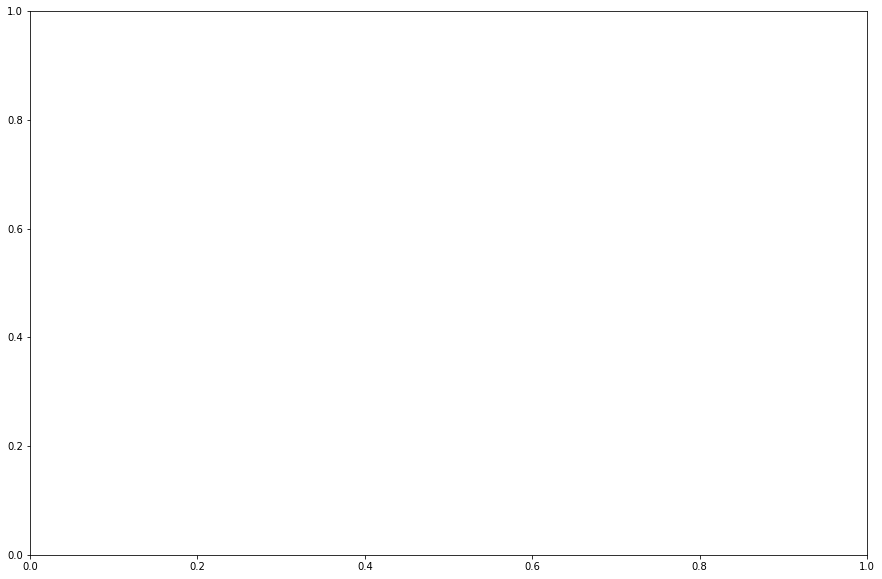

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(close_x_test)
plt.plot(predictions_close)
plt.legend(['real', 'predict'])